In [230]:
# installation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import bernoulli

In [231]:
penguins_iter = pd.read_csv("./penguins_lter.csv")

# for our dataset, we had 17 data points (columns) about 344 penguins:
# Column names: studyName	Sample Number	Species	Region	Island	Stage	Individual ID	Clutch Completion	Date Egg	Culmen Length (mm)	Culmen Depth (mm)	Flipper Length (mm)	Body Mass (g)	Sex	Delta 15 N (o/oo)	Delta 13 C (o/oo)	Comments

## Data Cleaning
### This is where we set any string/non-numeric values into numeric values as well as clean up NaN values so we don't face any confusions when performing clustering.

In [232]:
# Remove unnecessary columns
# Drop studyName, SampleNumber, and Comments
penguins_iter = penguins_iter.drop(['studyName', 'Sample Number', 'Comments', 'Stage', 'Individual ID', 'Date Egg'] ,axis=1)
penguins_iter

,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [233]:
# Next, change all string-like values into numeric values
# For example, change Species type (Adelie Penguin) to 1

# Species
species_value = penguins_iter['Species'].unique()
penguins_iter['Species'] = penguins_iter['Species'].replace(list(species_value), [x for x in range(1, len(species_value)+1)])

# Region
region_value = penguins_iter['Region'].unique()
penguins_iter['Region'] = penguins_iter['Region'].replace(list(region_value), [x for x in range(1, len(region_value)+1)])

# Island
island_value = penguins_iter['Island'].unique()
penguins_iter['Island'] = penguins_iter['Island'].replace(list(island_value), [x for x in range(1, len(island_value)+1)])

# Clutch Completion
clutch_value = penguins_iter['Clutch Completion'].unique()
penguins_iter['Clutch Completion'] = penguins_iter['Clutch Completion'].replace(list(clutch_value), [x for x in range(1, len(clutch_value)+1)])

penguins_iter

,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,1,1,1,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,1,1,1,1,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,1,1,1,1,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,1,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...
339,3,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,3,1,2,1,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,3,1,2,1,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,3,1,2,1,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [234]:
# For sex column, there are 4 values: Male / Female / . / NaN
# For ., consider it as NaN
# For all NaN values now, we can try to get probabilistic approach (get percentage of Male/Female, then replace it by using Bernoulli PDF)
sex_value = penguins_iter['Sex'].unique() # Values = ['MALE', 'FEMALE', nan, '.']
penguins_iter['Sex'] = penguins_iter['Sex'].replace(list(sex_value), ['Male', 'Female', 0, 0])
sex_value_count = dict(penguins_iter['Sex'].value_counts())
temp = penguins_iter.loc[penguins_iter['Sex'] == 0]
sex_replace = [bernoulli.rvs((sex_value_count['Male']/(sex_value_count['Male'] + sex_value_count['Female']))) for _ in range(len(temp))]
temp['Sex'] = sex_replace
penguins_iter.drop(temp.index, inplace=True)
penguins_iter = pd.concat([penguins_iter, temp])
sex_value = penguins_iter['Sex'].unique() # New vValues = ['MALE', 'FEMALE', 0, 1]
penguins_iter['Sex'] = penguins_iter['Sex'].replace(list(sex_value), [1, 0, 0, 1]) # we set Male as 1 since our bernoulli pdf is set to Male percentage
penguins_iter

C:\Users\yok018\AppData\Local\Temp/ipykernel_21840/3996462818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Sex'] = sex_replace


,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,1,1,1,39.1,18.7,181.0,3750.0,1,NaN,NaN
1,1,1,1,1,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454
2,1,1,1,1,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302
4,1,1,1,1,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426
5,1,1,1,1,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805
...,...,...,...,...,...,...,...,...,...,...,...
246,3,1,2,1,44.5,14.3,216.0,4100.0,1,7.96621,-25.69327
286,3,1,2,1,46.2,14.4,214.0,4650.0,1,8.24253,-26.81540
324,3,1,2,1,47.3,13.8,216.0,4725.0,1,8.25818,-26.23886
336,3,1,2,1,44.5,15.7,217.0,4875.0,0,8.04111,-26.18444


In [235]:
# Handle NaN for numeric columns
# replace with average value of non-NaN values

# Culmen Length (mm)
culmen_length_mean = penguins_iter['Culmen Length (mm)'].mean()
penguins_iter['Culmen Length (mm)'].fillna(culmen_length_mean, inplace=True)

# Culmen Depth (mm)
culmen_depth_mean = penguins_iter['Culmen Depth (mm)'].mean()
penguins_iter['Culmen Depth (mm)'].fillna(culmen_depth_mean, inplace=True)

# Flipper Length (mm)
flipper_length_mean = penguins_iter['Flipper Length (mm)'].mean()
penguins_iter['Flipper Length (mm)'].fillna(flipper_length_mean, inplace=True)

# Body Mass (g)
body_mass_mean = penguins_iter['Body Mass (g)'].mean()
penguins_iter['Body Mass (g)'].fillna(body_mass_mean, inplace=True)

# Delta 15N
delta_15_mean = penguins_iter['Delta 15 N (o/oo)'].mean()
penguins_iter['Delta 15 N (o/oo)'].fillna(delta_15_mean, inplace=True)

# Delta 13C
delta_13_mean = penguins_iter['Delta 13 C (o/oo)'].mean()
penguins_iter['Delta 13 C (o/oo)'].fillna(delta_13_mean, inplace=True)

# Reset Index
penguins_iter.reset_index(drop=True, inplace=True)
penguins_iter

,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,1,1,1,39.10000,18.70000,181.000000,3750.000000,1,8.733382,-25.686292
1,1,1,1,1,39.50000,17.40000,186.000000,3800.000000,0,8.949560,-24.694540
2,1,1,1,1,40.30000,18.00000,195.000000,3250.000000,0,8.368210,-25.333020
3,1,1,1,1,36.70000,19.30000,193.000000,3450.000000,0,8.766510,-25.324260
4,1,1,1,1,39.30000,20.60000,190.000000,3650.000000,1,8.664960,-25.298050
...,...,...,...,...,...,...,...,...,...,...,...
339,3,1,2,1,44.50000,14.30000,216.000000,4100.000000,1,7.966210,-25.693270
340,3,1,2,1,46.20000,14.40000,214.000000,4650.000000,1,8.242530,-26.815400
341,3,1,2,1,47.30000,13.80000,216.000000,4725.000000,1,8.258180,-26.238860
342,3,1,2,1,44.50000,15.70000,217.000000,4875.000000,0,8.041110,-26.184440


## K-Means Clustering
### We can potentially cluster all column values at once (if can), if not, we can try multiple clusterings on by combinations of column data.

In [236]:
import numpy as np
import matplotlib.pyplot as plt

def plotCurrent(X, Rnk, Kmus):
    N, D = X.shape
    K = Kmus.shape[0]

    InitColorMat = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0],
                             [1, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1]])

    KColorMat = InitColorMat[0:K,:]

    colorVec = np.dot(Rnk, KColorMat)
    muColorVec = np.dot(np.eye(K), KColorMat)
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(X[:,3],X[:,6], s=20, c=colorVec)

    ax.scatter(Kmus[:,3], Kmus[:,6], s=200, c=muColorVec, marker='d')
    

    ax.set_xlim(xmin=30, xmax=65)

    plt.show()

In [237]:
def calcSqDistances(X, Kmus):
    result = (-2 * X.dot(Kmus.T) + np.sum(np.multiply(Kmus,Kmus), axis=1).T).T
    return ( result + np.sum(np.multiply(X,X), axis=1)).T

def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis=1)
    return np.eye(sqDmat.shape[1])[m]

def recalcMus(X, Rnk):
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

def runKMeans(K, X, Kmus):
    maxiters = 1000
    sqDmat = calcSqDistances(X, Kmus);
    Rnk = determineRnk(sqDmat) 
    
    for iter in range(maxiters):
      sqDmat = calcSqDistances(X, Kmus);
      Rnk = determineRnk(sqDmat)
      KmusOld = Kmus
      Kmus = recalcMus(X, Rnk)
      if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
        break
    return Kmus, Rnk

In [238]:
# Split Training and Testing Dataset
training_penguins = penguins_iter.sample(frac=0.8) # Take 80% of the dataset
testing_penguins = penguins_iter.drop(training_penguins.index) # take rest (20%) of the dataset

# Separate Species to use it for Rnk
testing_species = np.asarray(testing_penguins.pop('Species'))
training_rnk = training_penguins.pop('Species')

# For training dataset, we take out rnk value, then find Kmus (species)
# change dataset to numpy 2D-array
training_penguins = training_penguins.to_numpy()
testing_penguins = testing_penguins.to_numpy() # Run once only

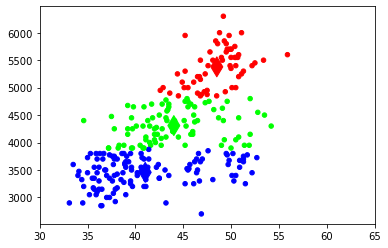

In [239]:
# Training Phase
N = np.shape(training_penguins)[0]
D = np.shape(training_penguins)[1]
Kmus = np.zeros((3, D))
rndinds = np.random.permutation(N)
Kmus = training_penguins[rndinds[:3]]
# sqDmat = calcSqDistances(training_penguins, Kmus)
# rnk = determineRnk(sqDmat)
Kmus_train_KMeans, Rnk_train_Kmeans = runKMeans(3, training_penguins, Kmus)
plotCurrent(training_penguins, Rnk_train_Kmeans, Kmus_train_KMeans)

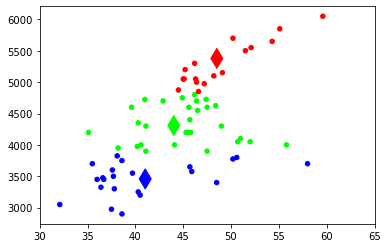

In [240]:
# Testing
N = np.shape(testing_penguins)[0]
D = np.shape(testing_penguins)[1]
sqDmat_test = calcSqDistances(testing_penguins, Kmus_train_KMeans);
Rnk_test = determineRnk(sqDmat_test)
plotCurrent(testing_penguins, Rnk_test, Kmus_train_KMeans)

In [241]:
def cluster_assignment(Kmus):
  x_train = testing_penguins
  y_train = testing_species.T
  dist = calcSqDistances(x_train, Kmus)
  resp = determineRnk(dist)
  cluster_dict = {}
  for i in range(len(Kmus)):
    cluster_members = resp[:,i]
    species = y_train[cluster_members == 1]
    species_value = np.bincount(species).argmax()
    cluster_dict.update({i + 1 : species_value})
  return cluster_dict

In [242]:
def determine_cluster(x, Kmus):
  sqdist = calcSqDistances(x, Kmus)
  m = np.argmin(sqdist, axis=1) + 1
  return m

In [243]:
def compute_accuracy(y, cluster_dict):
  accuracy = 0
  for i in range(len(testing_species.T)):
    accuracy += (testing_species.T[i] == cluster_dict[y[i]])
  return accuracy / len(testing_species.T)

In [244]:
def find_accuracy(Kmus):
  accuracy_table = {}

  penguins_new = penguins_iter.drop(columns=['Species']).to_numpy()

  cluster_dict = cluster_assignment(Kmus)
  cluster = list(determine_cluster(penguins_new, Kmus))
  accuracy_table.update({3: compute_accuracy(cluster, cluster_dict)})
  return str(accuracy_table)

find_accuracy(Kmus_train_KMeans)

'{3: 0.4057971014492754}'

# Treat like we have labels (species)
## DetermineRnk is visible
## Compare accuracy of clusters

## Gaussian Multiple Model
### Use GMM to see (if any) differences of clustering compare to K-Means Clustering.
##### We can also try time-consuming comparison as well as memory-size.

In [245]:
print(Kmus.shape)
print(training_penguins)

(3, 10)
[[  1.        3.        1.      ...   1.        9.43782 -24.36202]
 [  1.        3.        1.      ...   1.        9.72764 -25.0102 ]
 [  1.        3.        2.      ...   0.        9.41131 -25.04169]
 ...
 [  1.        1.        1.      ...   1.        9.13362 -25.09368]
 [  1.        2.        1.      ...   1.        9.31735 -25.45171]
 [  1.        3.        1.      ...   1.        9.88809 -24.59513]]


make sure to initialize the cleaned dataset


In [246]:
class MixtureOfGaussians():
    def __init__(self, X, K):
        self.X = X
        self.D = self.X.shape[1]
        self.num_clusters = K
        self.mu = runKMeans(K)
        self.prior = np.asarray([1/K]*K)
        self.cov = np.zeros((K,self.D,self.D))
        for i in range(self.num_clusters):
            self.cov[i] = np.diag([1,2])
        print(self.cov)
        
    # E step
    def calcRespons(self, x, prior_old, mu_old, cov_old):
        
        for iters in (range(1000)):
            N = len(x)
            h = np.zeros((N,self.num_clusters), dtype = np.float32)
            for cluster in range(self.num_clusters):
                h[:,cluster] = self.runGMM(x, mu_old[cluster], cov_old[cluster]) * prior_old[cluster]
                
            h = np.divide(h, np.sum(h,axis = 1, keepdims = True))
            print(f"Shape of h : {h.shape}")
            prior_new = np.sum(h,axis = 0)/N
            mu_new = np.divide(h.T @ x, np.sum(h,axis = 0, keepdims = True).T)
            
            print(f"mu new : {mu_new}")
            cov_temp = np.zeros((self.num_clusters, self.D))
            
            for cluster in range(self.num_clusters):
                cov_temp[cluster] = np.divide(h[:,cluster].T\
                                                    @ ((x - mu_new[cluster])*((x - mu_new[cluster]))), \
                                                     np.sum(h[:,cluster]))
            cov_new = np.zeros((self.num_clusters, self.D,self.D))
            for i in range(self.num_clusters):
                cov_new[i] = np.diag(cov_temp[i])
            print(f"new covariance : {cov_new}")
            print(f"Difference in norm value : {np.linalg.norm(mu_new - mu_old)}")
            if np.linalg.norm(mu_new - mu_old) < 1e-3:
                break
                
            prior_old, mu_old, cov_old = prior_new, mu_new, cov_new
            
        return prior_new, mu_new, cov_new
    
    # M step
    def recalcParams(self):
        
        prior_1, mu_1, cov_1 = self.calcRespons(self.X, self.prior, self.mu, self.cov)
        params = [mu_1, cov_1, prior_1]
        return params


    def runGMM(self, x, mu, cov):
        
        d = np.shape(x)[1]
        mu = mu[None, :]
        dr = 1/(np.sqrt((2* pi)**(d) * np.linalg.det(cov)))
        nr = (np.exp(-np.diag((x - mu)@(np.linalg.inv(cov))@((x-mu).T) / 2)))
        return nr * dr

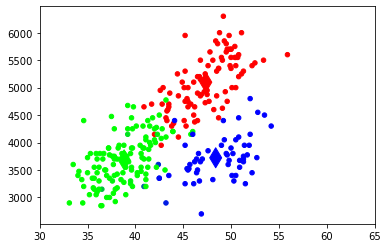

In [247]:
# run and graph

# we will graph prediction based on culmen length and body mass 
# (continuous numeric is useful for graphing visually)
from scipy.stats import multivariate_normal

def e(X, pi, mu, sigma): # calcResponse
    gamma = np.zeros((K,X.shape[0]), dtype = np.float32)
    for cluster in range(K):
        gamma[cluster, :] = multivariate_normal(mean=mu[cluster], cov=sigma[cluster], allow_singular=True).pdf(X) * pi[cluster]
    gamma = np.divide(gamma, np.sum(gamma, axis = 0, keepdims = True)).T
    return gamma

def m(gamma, X): # recalcParams
    N, D = X.shape
    prior_new = np.sum(gamma, axis = 0) / N 
    mu_new = np.divide(gamma.T @ X, np.sum(gamma, axis = 0, keepdims = True).T)
    cov_temp = np.zeros((K, D))
    for cluster in range(K):
        cov_temp[cluster] = np.divide(gamma[:,cluster].T @ ((X - mu_new[cluster]) *
                            ((X - mu_new[cluster]))), np.sum(gamma[:,cluster]))
    cov_new = np.zeros((K, D, D))
    for i in range(K):
        cov_new[i] = np.diag(cov_temp[i])
    return prior_new, mu_new, cov_new

def sampleCovariance(X):
  mean = np.sum(X, axis=0) / np.shape(X)[0]
  Y = X - mean
  return Y.T @ Y

def runGMM(K, dataset, prevKmus = None):
    # k means initialize
    X = dataset
    N, D = X.shape
    Kmus = np.zeros((K, D))
    maxiters = 10000

    Kmus = 0 # <------ initialize this to the result from Kmeans above
    if prevKmus is not None:
      Kmus = prevKmus

    # initialize variables
    oldmu = Kmus
    pi = np.asarray([1/K]*K)
    sigma = np.zeros((K, D, D))
    sampleCov = sampleCovariance(X)
    for i in range(K):
        sigma[i] = np.copy(sampleCov)
        #sigma[i] = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        #sigma[i] *= 10000
    gamma = np.zeros((N,K), dtype = np.float32)

    for iters in range(maxiters):
        gamma = e(X, pi, Kmus, sigma)
        pi, Kmus, sigma = m(gamma, X)

        # check for convergence
        if np.linalg.norm(Kmus - oldmu) < 1e-3:
            plotCurrent(X, gamma, Kmus)
            test_result_GMM = e(testing_penguins, pi, Kmus, sigma)
            return Kmus, gamma, test_result_GMM

        oldmu = Kmus
    
    plotCurrent(X, gamma, Kmus)
    test_result_GMM = e(testing_penguins, pi, Kmus, sigma)
    return gamma, Kmus, test_result_GMM

# test
K = 3
# training_penguins = training_penguins.to_numpy()
# testing_penguins = testing_penguins.to_numpy() 

test_gamma_GMM, test_Kmus_GMM, test_result_GMM = runGMM(3, training_penguins, Kmus)
# plotCurrent(testing_penguins, test_gamma_GMM, test_Kmus_GMM)

In [248]:
# run on test data
# test_gamma_GMM, test_Kmus_GMM = runGMM(3, testing_penguins, Kmus)
# plotCurrent(testing_penguins, test_gamma_GMM, test_Kmus_GMM)

In [249]:
# find accuracy

# use output Kmus to find correct labelling of each species on the test dataset

# testing_species = list(testing_species)

# accurate_penguins = 0
# for i in range(len(testing_species)):
#   if testing_species[i] == correct[i]:
#     accurate_penguins += 1

# print(accurate_penguins/len(testing_species)*100)

# find_accuracy(test_Kmus_GMM)

# print accuracies for each of the 3 species

In [250]:
# Saving results
with open("kmeans.txt", "a") as myfile:
    myfile.write(find_accuracy(Kmus_train_KMeans) + "\n")

with open("gmms.txt", "a") as myfile:
    myfile.write(find_accuracy(test_Kmus_GMM) + "\n")

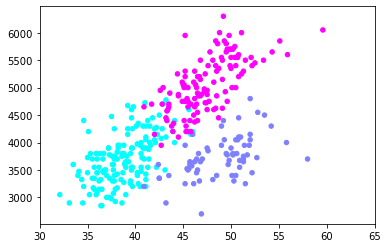

In [251]:
# This prints out what the correct labelled graph should look like
X = penguins_iter
label = np.asarray(X.pop('Species'))
X = X.to_numpy() 
colorVec = label * (1/3)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(X[:,3],X[:,6], s=20, c=colorVec, cmap='cool')

ax.set_xlim(xmin=30, xmax=65)
plt.show()

In [252]:
# print(X[:,3],X[:,6])
# print(penguins_iter)
# print(test_result_GMM)
size = len(testing_species)
print(testing_species)
GMM_test_labels = np.argmax(test_result_GMM, axis=1)

# The correct way to do this is to go through each true category of species and
# find the proportion that were labelled correctly. For simplicity of code,
# there is this hack that will correctly map the labels from GMM to the numbers
# of the category numbers in the dataset.
for i in range(size):
  if (GMM_test_labels[i] == 1):
    GMM_test_labels[i] = 4
  if (GMM_test_labels[i] == 2):
    GMM_test_labels[i] = 1
  if (GMM_test_labels[i] == 0):
    GMM_test_labels[i] = 3
  if (GMM_test_labels[i] == 4):
    GMM_test_labels[i] = 2
print(GMM_test_labels)


correct = 0
for i in range(size):
  correct = correct + (GMM_test_labels[i] == testing_species[i])
print(size)
print(correct)
print("percent", correct / size)
# print(len(np.argmax(test_result_GMM, axis=1)))
# plotCurrent(testing_penguins, test_result_GMM, test_Kmus_GMM)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3]
[2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3]
69
30
percent 0.43478260869565216
